In [2]:
import numpy as np
from scipy import stats
import numpy

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import graphviz

In [5]:
COLORS = [
    '#00B0F0',
    '#FF0000'
]

# Chapter 04

In this chapter we focus on graphical models for causal inference. We start with a refresher on graphs. Next, we introduce a concept of graphical models and directed  acyclic graphs. Finally, we discuss the limitations of DAGs and show a couple of different approaches to model cyclic relationships. This and next chapter are critical to understand the very essence of causal inference as understood in this book.

## Visualizations

In [6]:
nodes = ['A', 'B', 'C', 'D']

In [7]:
# Define graphs
graphs = {
    
    'DAG': {
        'graph': graphviz.Digraph(format='png'),
        'edges': ['AB', 'BC', 'AD', 'DC']
    },
    
    'DCG': {
        'graph': graphviz.Digraph(format='png'),
        'edges': ['AB', 'AD', 'BB', 'BC', 'DC', 'CA']
    },
    
    'Undirected': {
        'graph': graphviz.Graph(format='png'),
        'edges': ['AB', 'BC', 'AD', 'DC']
    }, 
    
    'Fully connected': {
        'graph': graphviz.Graph(format='png'),
        'edges': ['AB', 'AC', 'AD', 'BC', 'BD', 'CD']
    },
    
    'Partially connected': {
        'graph': graphviz.Graph(format='png'),
        'edges': ['AB', 'AC', 'BC']
    }
}


# Iterate over graphs and render
for name, graph in graphs.items():
    
    [graph['graph'].node(n) for n in nodes]
    graph['graph'].edges(graph['edges'])
    
    graph['graph'].render(f'img/ch_04_graph_{name}')

### Adjacency matrices

$$\Large \begin{bmatrix} 0 & 1 \\ 0 & 0 \end{bmatrix}$$

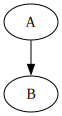

In [8]:
graph = graphviz.Digraph(format='png')

nodes = ['A', 'B']

edges = ['AB']

[graph.node(n) for n in nodes]
graph.edges(edges)

graph.render(f'img/ch_04_graph_adj_00')

graph

$$\Large \begin{bmatrix} 0 & 1 & 0 \\ 0 & 0 & 0 \\ 1 & 1 & 0 \end{bmatrix}$$

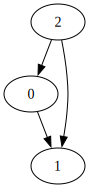

In [9]:
graph = graphviz.Digraph(format='png')

nodes = ['0', '1', '2']

edges = ['01', '21', '20']

[graph.node(n) for n in nodes]
graph.edges(edges)

graph.render(f'img/ch_04_graph_adj_01')

graph

$$\Large \begin{bmatrix} 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 \\ 1 & 0 & 1 & 0 \end{bmatrix}$$

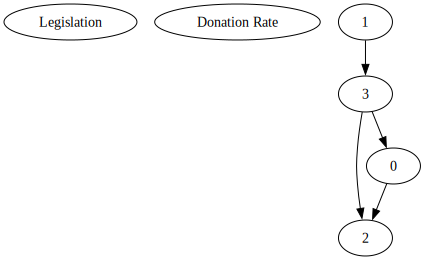

In [10]:
graph = graphviz.Digraph(format='png')

nodes = ['Legislation', 'Donation Rate', '2', '3']

edges = ['02', '13', '32', '30']

[graph.node(n) for n in nodes]
graph.edges(edges)

graph.render(f'img/ch_04_graph_adj_02')

graph

## Graphs in Python 

In [11]:
import networkx as nx

### Edge list

### GML 

**GML** stands for graph modeling language. 

More on **GML** synatx here: https://github.com/GunterMueller/UNI_PASSAU_FMI_Graph_Drawing/blob/master/GML/gml-technical-report.pdf

In [12]:
# Define the graph
sample_gml = """graph [
directed 1

node [
    id 0
    label "Donation Rate"
    ]

node [
    id 1
    label "Legislation"
    ]
    
node [
    id 2
    label "Income"
    ]
    
node [
    id 3
    label "Unemployment Rate"
    ]
    
node [
    id 4
    label "Year FE"
    ]
    
    
node [
    id 5
    label "State FE"
    ]


edge [
    source 1
    target 0
    ]
    
edge [
    source 5
    target 0
    ]
    
edge [
    source 5
    target 1
    ]
    

edge [
    source 5
    target 2
    ]    
    
edge [
    source 5
    target 3
    ]   
    
edge [
    source 4
    target 0
    ]
    
edge [
    source 4
    target 1
    ]
    
    
edge [
    source 4
    target 2
    ]
    
edge [
    source 4
    target 3
    ]
    
]
    
    """

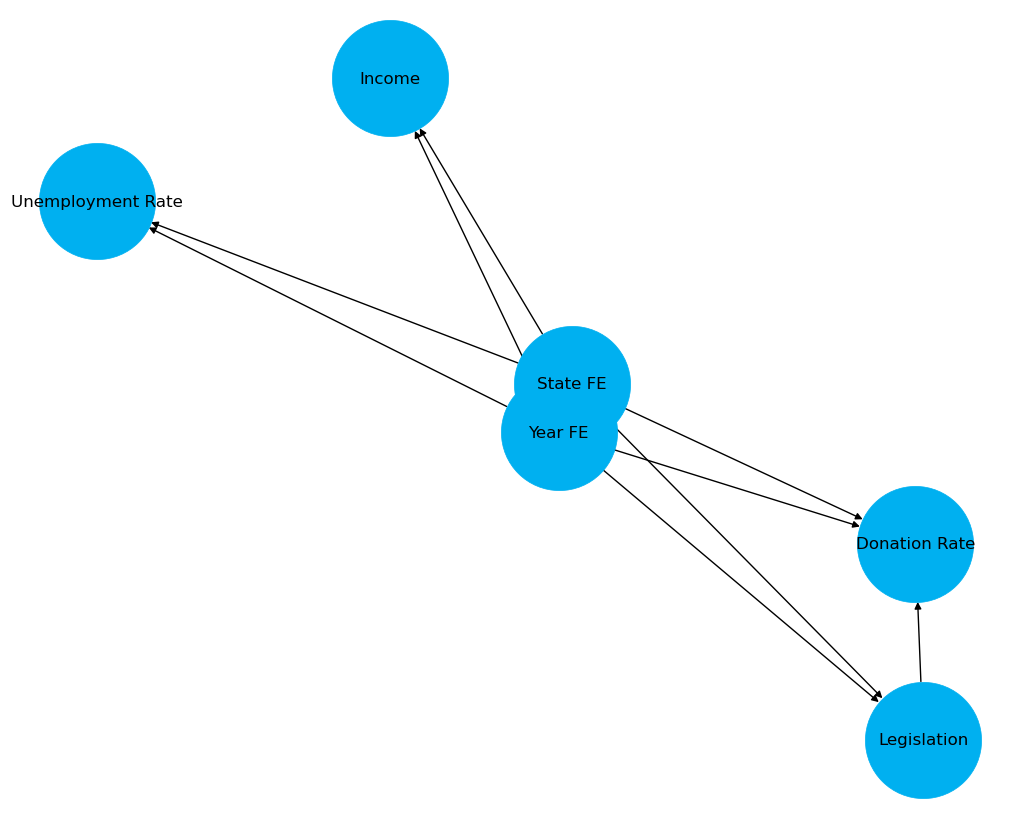

In [13]:
# Get the graph
graph = nx.parse_gml(sample_gml)

plt.figure(figsize=(10, 8))


# Plot
nx.draw(
    G=graph, 
    with_labels=True,
    node_size=7000,
    node_color=COLORS[0],
    font_color='black'
)

plt.show()

### Adjacency matrix

In [11]:
# Define the matrix
adj_matrix = np.array([
    [0, 1, 0],
    [0, 0, 0],
    [0, 1, 0]
])

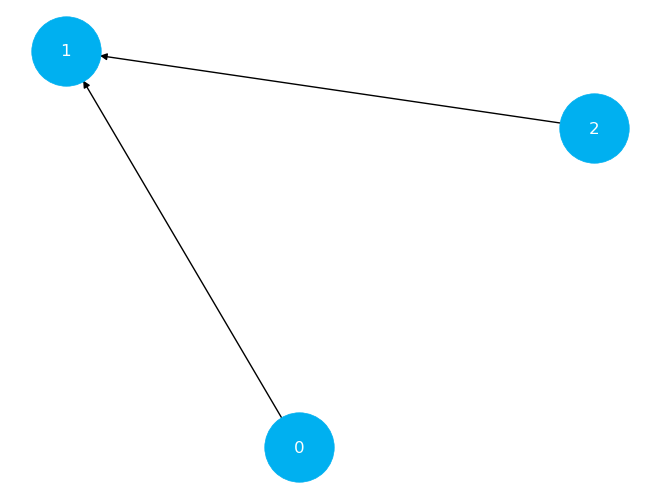

In [12]:
# Get the graph
graph = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)

labels = ['Legislation', 'Organ Donation Rate', 'Income']



# Plot
nx.draw(
    G=graph, 
    with_labels=labels,
    node_size=2500,
    node_color=COLORS[0],
    font_color='white'
)

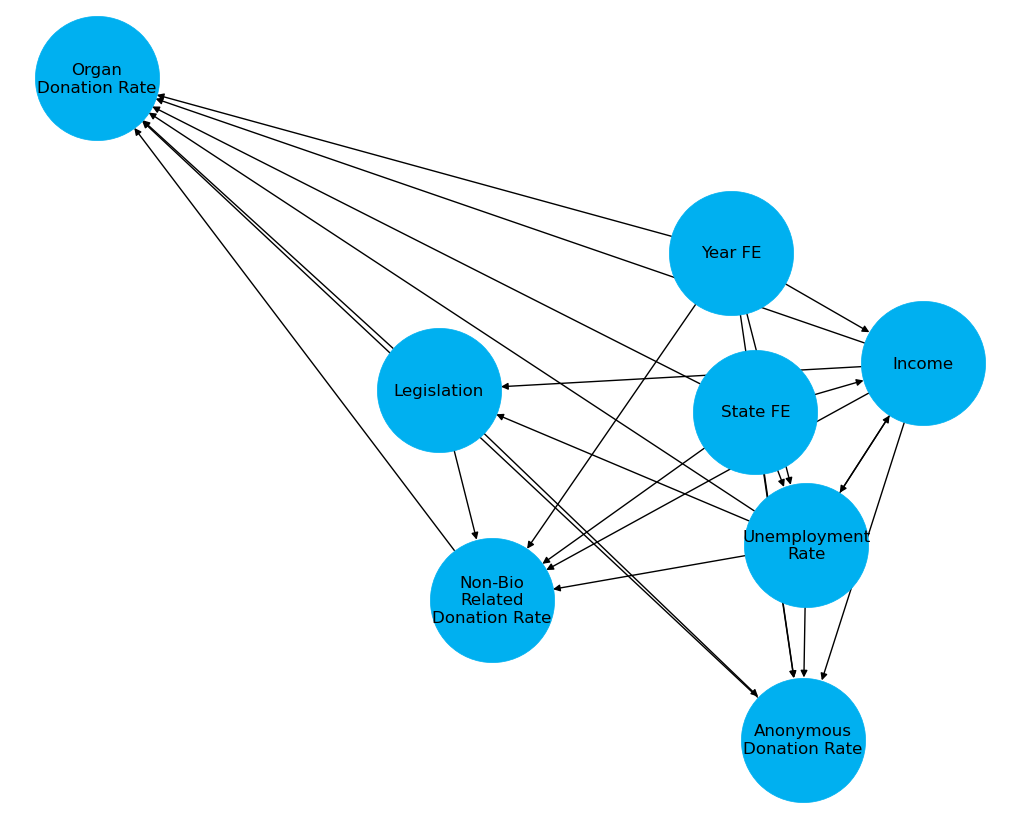

In [13]:
# Define the matrix
adj_matrix = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 0, 1, 0, 0, 1, 1],
    [1, 1, 1, 0, 0, 0, 1, 1],
    [1, 0, 1, 1, 0, 0, 1, 1],
    [1, 0, 1, 1, 0, 0, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0],
])



labels = {
    0: "Organ\nDonation Rate",
    1: "Legislation",
    2: "Income",
    3: "Unemployment\nRate",
    4: "State FE",
    5: "Year FE",
    6: "Anonymous\nDonation Rate",
    7: "Non-Bio\nRelated\nDonation Rate",
}

# Get the graph
graph = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)
graph = nx.relabel_nodes(graph, labels)


plt.figure(figsize=(10, 8))
# Plot
nx.draw(
    G=graph, 
    with_labels=True,
    node_size=8000,
    node_color=COLORS[0],
    font_color='black',
)

plt.show()

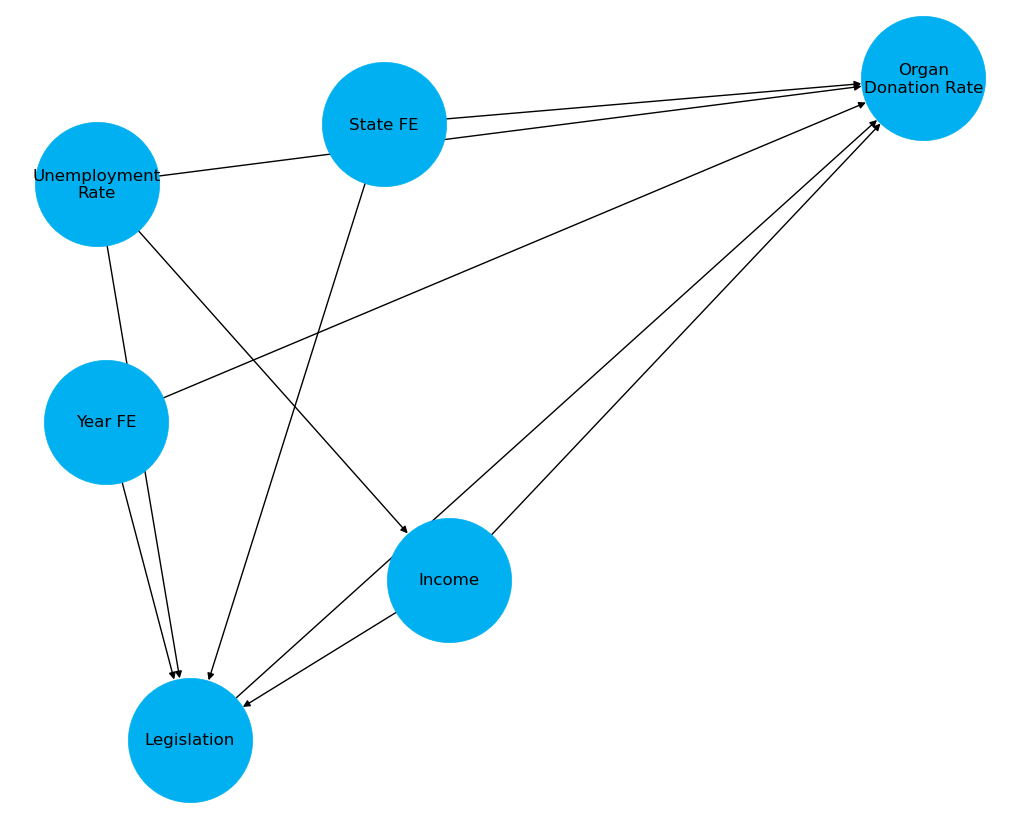

In [18]:
adj_matrix = np.array([
    [0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0],
    [1, 1, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0],
])

    
labels = {
    0: "Organ\nDonation Rate",
    1: "Legislation",
    2: "Income",
    3: "Unemployment\nRate",
    4: "State FE",
    5: "Year FE",
}

# Get the graph
graph = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)
graph = nx.relabel_nodes(graph, labels)


plt.figure(figsize=(10, 8))
# Plot
nx.draw(
    G=graph, 
    with_labels=True,
    node_size=8000,
    node_color=COLORS[0],
    font_color='black',
)

plt.show()

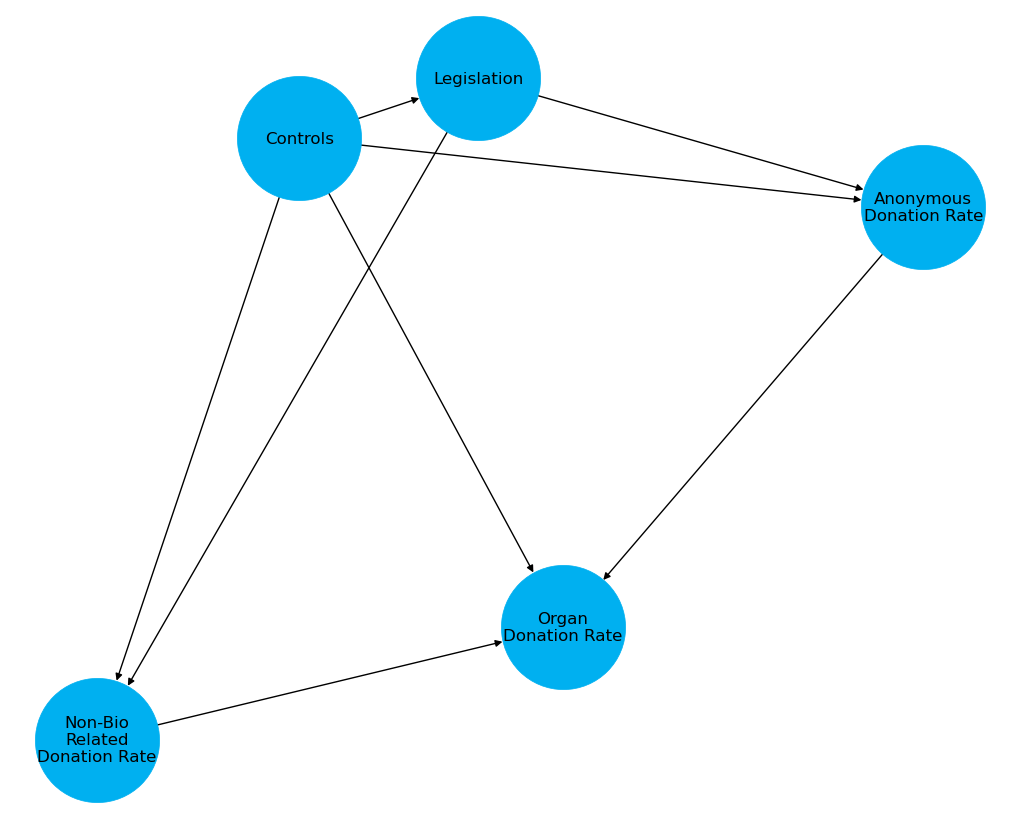

In [23]:
adj_matrix = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1],
    [1, 1, 0, 1, 1],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0],
])

    
labels = {
    0: "Organ\nDonation Rate",
    1: "Legislation",
    2: "Controls",
    3: "Anonymous\nDonation Rate",
    4: "Non-Bio\nRelated\nDonation Rate",
}

# Get the graph
graph = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)
graph = nx.relabel_nodes(graph, labels)


plt.figure(figsize=(10, 8))
# Plot
nx.draw(
    G=graph, 
    with_labels=True,
    node_size=8000,
    node_color=COLORS[0],
    font_color='black',
)

plt.show()

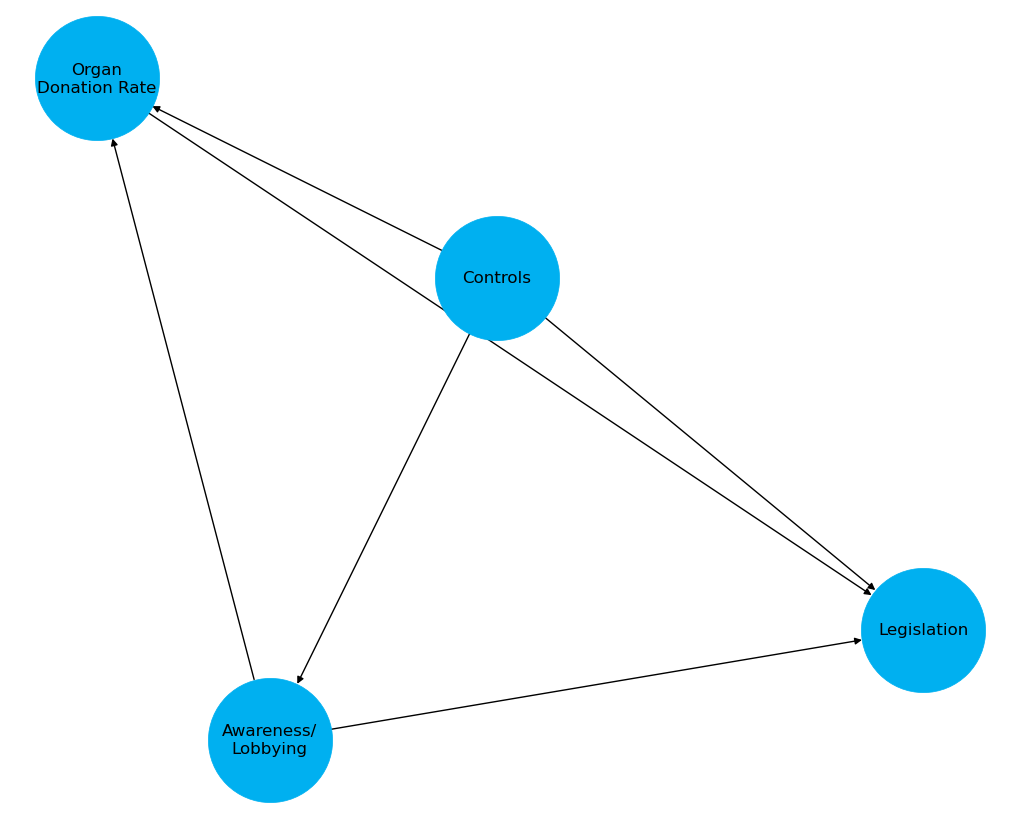

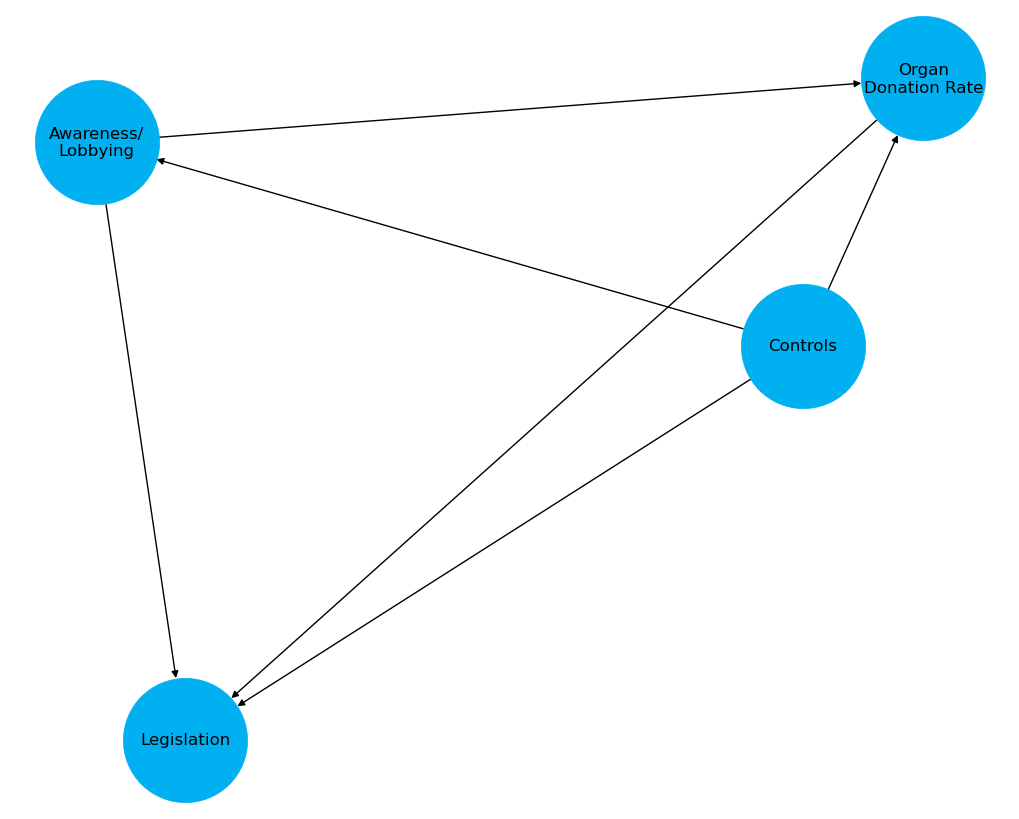

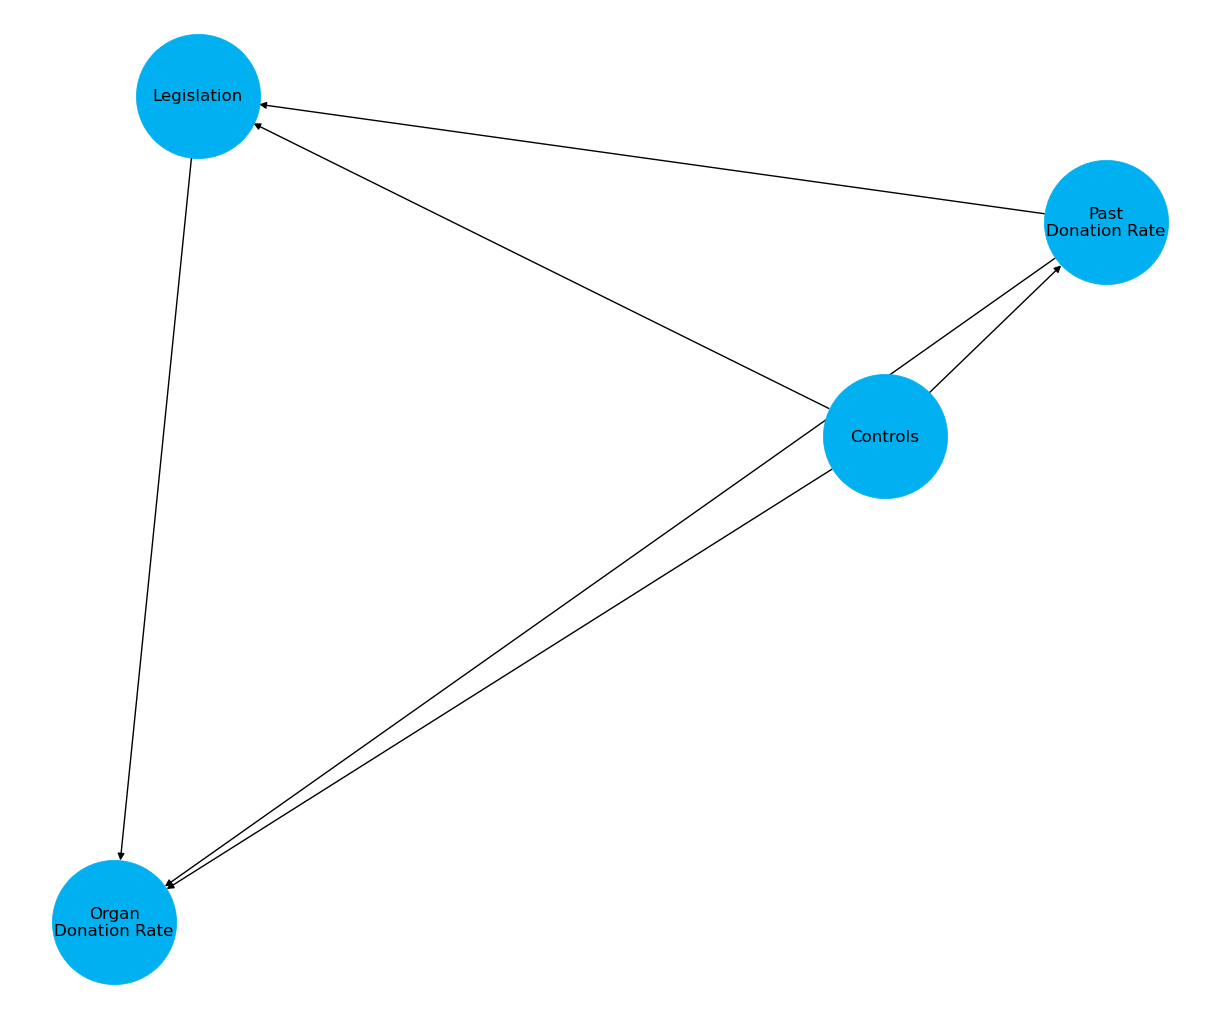

In [16]:
adj_matrix = np.array([
    [0, 1, 0, 0],
    [0, 0, 0, 0],
    [1, 1, 0, 0],
    [1, 1, 1, 0],
])

    
labels = {
    0: "Organ\nDonation Rate",
    1: "Legislation",
    2: "Awareness/\nLobbying",
    3: "Controls",
}

# Get the graph
graph = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)
graph = nx.relabel_nodes(graph, labels)


plt.figure(figsize=(10, 8))
# Plot
nx.draw(
    G=graph, 
    with_labels=True,
    node_size=8000,
    node_color=COLORS[0],
    font_color='black',
)

plt.show()


adj_matrix = np.array([
    [0, 1, 0, 0],
    [0, 0, 0, 0],
    [1, 1, 0, 0],
    [1, 1, 1, 0],
])

    
labels = {
    0: "Organ\nDonation Rate",
    1: "Legislation",
    2: "Awareness/\nLobbying",
    3: "Controls",
}

# Get the graph
graph = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)
graph = nx.relabel_nodes(graph, labels)


plt.figure(figsize=(10, 8))
# Plot
nx.draw(
    G=graph, 
    with_labels=True,
    node_size=8000,
    node_color=COLORS[0],
    font_color='black',
)

plt.show()

adj_matrix = np.array([
    [0, 0, 0, 0],
    [1, 0, 0, 0],
    [1, 1, 0, 0], 
    [1, 1, 1, 0],
])

    
labels = {
    0: "Organ\nDonation Rate",
    1: "Legislation",
    2: "Past\nDonation Rate",
    3: "Controls",
}

# Get the graph
graph = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)
graph = nx.relabel_nodes(graph, labels)


plt.figure(figsize=(12, 10))
# Plot
nx.draw(
    G=graph, 
    with_labels=True,
    node_size=8000,
    node_color=COLORS[0],
    font_color='black',
)

plt.show()

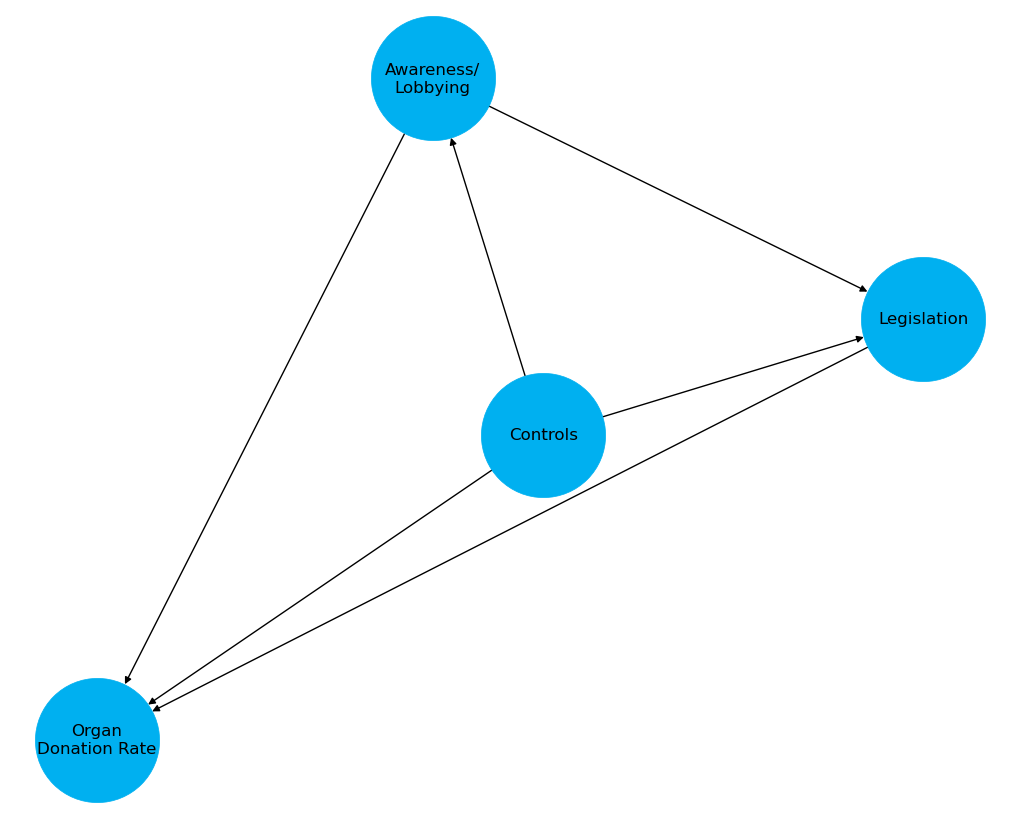

In [17]:
adj_matrix = np.array([
    [0, 0, 0, 0],
    [1, 0, 0, 0],
    [1, 1, 0, 0],
    [1, 1, 1, 0],
])

    
labels = {
    0: "Organ\nDonation Rate",
    1: "Legislation",
    2: "Awareness/\nLobbying",
    3: "Controls",
}

# Get the graph
graph = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)
graph = nx.relabel_nodes(graph, labels)


plt.figure(figsize=(10, 8))
# Plot
nx.draw(
    G=graph, 
    with_labels=True,
    node_size=8000,
    node_color=COLORS[0],
    font_color='black',
)

plt.show()